In [2]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import os

In [3]:
"""
データを読み込み
"""

# csvファイルの読み込みと空のリストに追加
import pandas as pd
df = pd.read_csv(filepath_or_buffer=r"/Users/s.ogura/Documents/CRLEA/data/received_20220414/crlea0414_summary_0419v3.csv",sep=",")
df = df.rename(columns={'科目コード': '科目',
                   '企画ペース': '想定ペース',
                   'ペース平均': '実績ペース'})
#企画ペースの空欄除去
df = df[~df["想定ペース"].isna()]
df = df[df["実績ペース"]!=0]
#国数英をフィルタ
df= df[df['科目'].isin([10, 20, 30])]
#変数名変更
df = df.replace({'科目': {10: '国語', 20: '数学', 30: '英語'}})

#表記揺れ
df["分野3"]=df["分野2"]
df["分野3"]=df["分野3"].replace({'現代文・評論（理由説明）': '評論','現代文・評論': '評論','現代文（評論）': '評論',
                             '現代文・小説': '小説','現代文（小説）': '小説',
                             '現代文（随筆）': '随筆'})

df["分野3"]=df["分野3"].replace({'表現力（和文英訳）': '英訳','表現力（英訳）': '英訳',
                             'ポ自由英作': '英作','ポ表現力（英作文）': '英作','会話表現（英作文）': '英作',
                             'ポ表現力（英文補完）': '英作','長文読解（英文補完）': '英作','表現力（英作文）': '英作',
                             '自由英作': '英作','部分英作': '英作','長文読解(英文補完）': '英作',
                             '表現力(英文補完）': '英作','表現力（英文補完）': '英作',
                             '長文読解（内容説明）日本語': '内説','長文読解（内容説明）': '内説','下線部和訳': '内説',
                             '大意要約': '内説',
                             'ﾘｽﾆﾝｸﾞ': 'リスニング','リスニング（英文補完）': 'リスニング'})
df["実測値からのばらつき"]=(df["実績ペース"]-df["想定ペース"])/df["実績ペース"]
df["実測値からのばらつき"]
df.head(3)

,Unnamed: 0,割当,科目,採点者数,所要合計時間,採点枚数合計,実績ペース,ペース最大値,ペース最小値,ペース中央値,ペース分散,ペース偏差二乗和,採点回,学年,分野,想定ペース,最終ペース,分野2,分野3,実測値からのばらつき
0,0,1,国語,55.0,4963319.0,366913.0,349.615844,1649.259462,77.254963,309.220098,60788.556230,3.343371e+06,夏,1,評論,330.0,273.3,評論,評論,0.056107
1,3,2,国語,59.0,10355031.0,369844.0,167.625006,349.726869,23.013071,178.527124,5702.131548,3.364258e+05,夏,1,ポ評論,205.0,133.1,評論,評論,-0.222968
2,6,3,国語,98.0,10613873.0,269444.0,136.034648,372.743363,13.701005,121.277109,5951.336556,5.832310e+05,夏,1,ポ小説,145.0,93.5,小説,小説,-0.065905


In [7]:
pd.unique(df[df['科目']=="数学"]['分野'])

array(['ポ数と式', '2次関数,場合の数,図形の性質', '場合の数と確率', 'ポ2次関数', 'ポ図形と計量',
       '式と証明, 高次方程式, 図形と方程式, 三角関数, 数列, ベクトル', '数と式', '2次関数, 場合の数と確率',
       '図形と方程式, 三角関数, 整数の性質', 'ポ微分法・積分法', '微分法, 複素数平面', 'ポ式と証明', 'ポ図形と軽量',
       'ポ場合の数と確率', '数列, 指数関数・対数関数', 'ポ数列の極限', '三角関数',
       '場合の数と確率, 図形と方程式, 微分法・積分法, 数列, ベクトル, データの分析, 2次関数, 図形と計量',
       '空間ベクトル', '複素数と方程式', '微分法・積分法（Ⅲ）', 'ポ図形と方程式', '空間ベクトル, 複素数平面',
       '図形と方程式', '平面ベクトル, 三角関数', '二次関数',
       '場合の数と確率, 図形と方程式, 微分法・積分法, 数列, ベクトル, データの分析, 二次関数, 図形と計量', 'ポ二次関数',
       '図形と計量, 確率, 整数の性質, 図形の性質', '式と証明・高次方程式', '数列, ベクトル, 微分法, 指数・対数関数',
       'データの分析', '図形と計量', '数と式, 図形と方程式, 三角関数, 場合の数と確率', 'ポ式と証明・高次方程式',
       '図形と方程式, 三角関数, 微分法, 数列, ベクトル', '式と証明・高次方程式, 図形と方程式, 数と式, 場合の和と確率'],
      dtype=object)

In [16]:
math_bunya=["ポ数と式",'2次関数','場合の数',"図形の性質","場合の数と確率","ポ2次関数","ポ図形と計量",
            '式と証明', '高次方程式', '図形と方程式', '三角関数', '数列', "ベクトル", "数と式",'2次関数',
            "場合の数と確率", '図形と方程式', '三角関数', "整数の性質","ポ微分法・積分法",'微分法', "複素数平面",
            "ポ式と証明","ポ図形と軽量","ポ場合の数と確率","数列","指数関数・対数関数","ポ数列の極限","三角関数",
            '場合の数と確率', '図形と方程式', '微分法・積分法', '数列', 'ベクトル', 'データの分析', '2次関数',"図形と計量",
            "空間ベクトル","複素数と方程式","微分法・積分法（Ⅲ）","ポ図形と方程式",'空間ベクトル', "複素数平面","図形と方程式",
            '平面ベクトル', "三角関数","二次関数",'場合の数と確率', '図形と方程式', '微分法・積分法', '数列', 'ベクトル',
            'データの分析', '二次関数', "図形と計量", "ポ二次関数",'図形と計量', '確率', '整数の性質', "図形の性質",
            "式と証明・高次方程式",'数列', 'ベクトル', '微分法',"指数・対数関数","データの分析","図形と計量",'数と式', '図形と方程式',
            '三角関数', "場合の数と確率", "ポ式と証明・高次方程式",'図形と方程式', '三角関数', '微分法', "数列", "ベクトル",
            '式と証明・高次方程式', '図形と方程式', '数と式', '場合の和と確率']

In [22]:
pd.unique(math_bunya)

array(['ポ数と式', '2次関数', '場合の数', '図形の性質', '場合の数と確率', 'ポ2次関数', 'ポ図形と計量',
       '式と証明', '高次方程式', '図形と方程式', '三角関数', '数列', 'ベクトル', '数と式', '整数の性質',
       'ポ微分法・積分法', '微分法', '複素数平面', 'ポ式と証明', 'ポ図形と軽量', 'ポ場合の数と確率',
       '指数関数・対数関数', 'ポ数列の極限', '微分法・積分法', 'データの分析', '図形と計量', '空間ベクトル',
       '複素数と方程式', '微分法・積分法（Ⅲ）', 'ポ図形と方程式', '平面ベクトル', '二次関数', 'ポ二次関数',
       '確率', '式と証明・高次方程式', '指数・対数関数', 'ポ式と証明・高次方程式', '場合の和と確率'],
      dtype=object)

In [21]:
# math_bunya2 = set(math_bunya)
# math_bunya2

In [298]:
#グラフ描画
def graph_all(df,title ="想定ペース vs 実績ペース",hue = "科目"):
    x = np.linspace(0,1000,1000)
    y = x
    plt.plot(x,y, color = "black", ls = "--")
    # plt.plot(x,y/2, color = "red", ls = "--")
    # plt.plot(x,2*y, color = "red", ls = "--")
    # plt.xlim(0,1000)
    # plt.ylim(0,1000)
    plt.title(title,
                      fontsize=20) # タイトル
    plt.xlabel("想定ペース", fontsize=20) # x軸ラベル
    plt.ylabel("実績ペース", fontsize=20) # y軸ラベル
    plt.grid(True) # 目盛線の表示
    plt.tick_params(labelsize = 12) # 目盛線のラベルサイズ
    plt.xticks(np.arange(0, 1001, step=100))
    plt.yticks(np.arange(0, 1001, step=100))
    sns.scatterplot(x='想定ペース', y='実績ペース', hue = hue, palette='bright', alpha = 0.8, data=df)

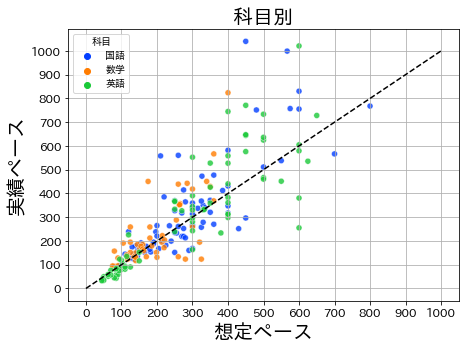

In [299]:
#グラフ描画
fig,axes = plt.subplots(1,1,figsize=(7,5))
graph_all(df,"科目別")
fig.savefig("/Users/s.ogura/Documents/CRLEA/figure/国数英.png")

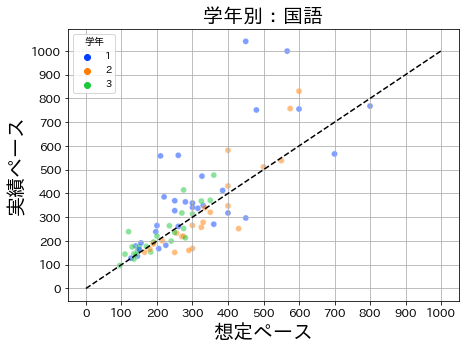

In [290]:
#グラフ描画
fig,axes = plt.subplots(1,1,figsize=(7,5))
graph_all(df[df["科目"] == "国語"], "学年別：国語",hue = "学年")
fig.savefig("/Users/s.ogura/Documents/CRLEA/figure/国*年.png")

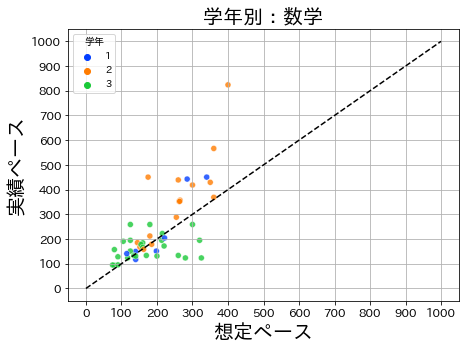

In [301]:
#グラフ描画
fig,axes = plt.subplots(1,1,figsize=(7,5))
graph_all(df[df["科目"] == "数学"], "学年別：数学",hue = "学年")
fig.savefig("/Users/s.ogura/Documents/CRLEA/figure/数学*年.png")

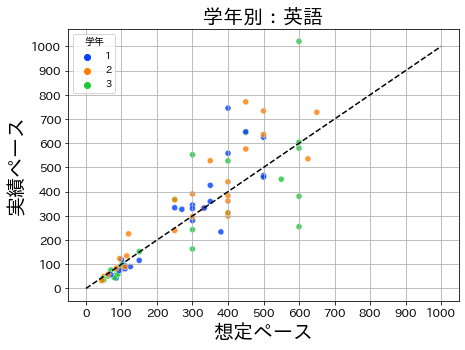

In [300]:
#グラフ描画
fig,axes = plt.subplots(1,1,figsize=(7,5))
graph_all(df[df["科目"] == "英語"], "学年別：英語",hue = "学年")
fig.savefig("/Users/s.ogura/Documents/CRLEA/figure/英語*年.png")

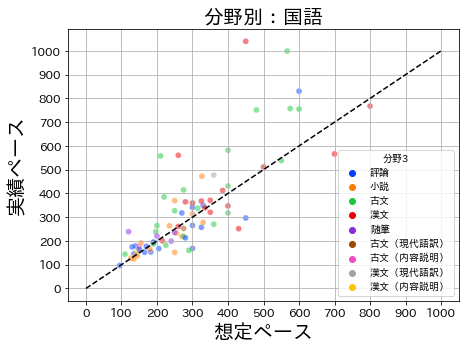

In [291]:
#グラフ描画
fig,axes = plt.subplots(1,1,figsize=(7,5))
graph_all(df[df["科目"] == "国語"], "分野別：国語",hue = "分野3")
fig.savefig("/Users/s.ogura/Documents/CRLEA/figure/国*分野.png")

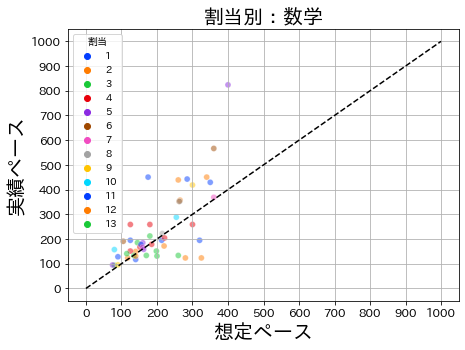

In [293]:
#グラフ描画
fig,axes = plt.subplots(1,1,figsize=(7,5))
graph_all(df[df["科目"] == "数学"], "割当別：数学",hue = "割当")
fig.savefig("/Users/s.ogura/Documents/CRLEA/figure/数*割当.png")

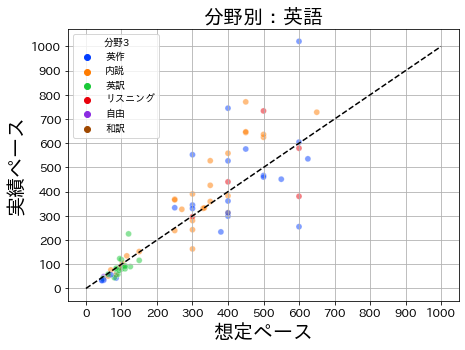

In [292]:
#グラフ描画
fig,axes = plt.subplots(1,1,figsize=(7,5))
graph_all(df[df["科目"] == "英語"], "分野別：英語",hue = "分野3")
fig.savefig("/Users/s.ogura/Documents/CRLEA/figure/英*分野.png")

In [4]:
#グラフ描画
def graph_bunya(df,title,hue):
    plt.title(title,
              fontsize=20) # タイトル
    plt.xlabel("分野", fontsize=20) # x軸ラベル
    plt.ylabel("(実績値-想定値)/実績値", fontsize=20) # y軸ラベル
    plt.grid(True) # 目盛線の表示
    plt.tick_params(labelsize = 12) # 目盛線のラベルサイズ
    plt.xticks(rotation = 90)
    plt.yticks()
    sns.scatterplot(x='分野3', y='実測値からのばらつき', hue = hue, palette='bright', alpha = 0.5, data=df)

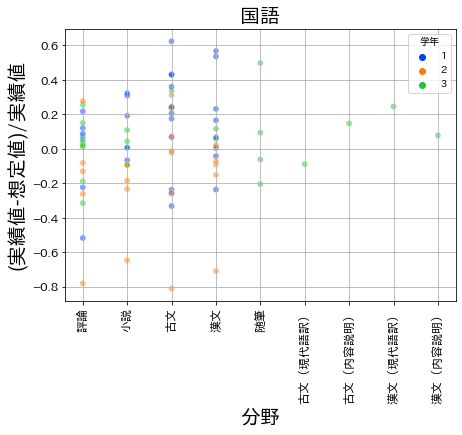

In [245]:
#グラフ描画
fig,axes = plt.subplots(1,1,figsize=(7,5))
graph_bunya(df[df["科目"] == "国語"],"国語","学年")
fig.savefig("/Users/s.ogura/Documents/CRLEA/figure/国語*分野.png")

In [257]:
#グラフ描画
def graph_wariate(df,title,hue):
    plt.title(title,
              fontsize=20) # タイトル
    plt.xlabel("分野", fontsize=0) # x軸ラベル
    plt.ylabel("(実績値-想定値)/実績値", fontsize=20) # y軸ラベル
    plt.grid(True) # 目盛線の表示
    plt.tick_params(labelsize = 12) # 目盛線のラベルサイズ
    plt.xticks(np.arange(1, 15, step=1),rotation = 90)
    plt.yticks()
    sns.scatterplot(x='割当', y='実測値からのばらつき', hue = hue, palette='bright', alpha = 0.5, data=df)

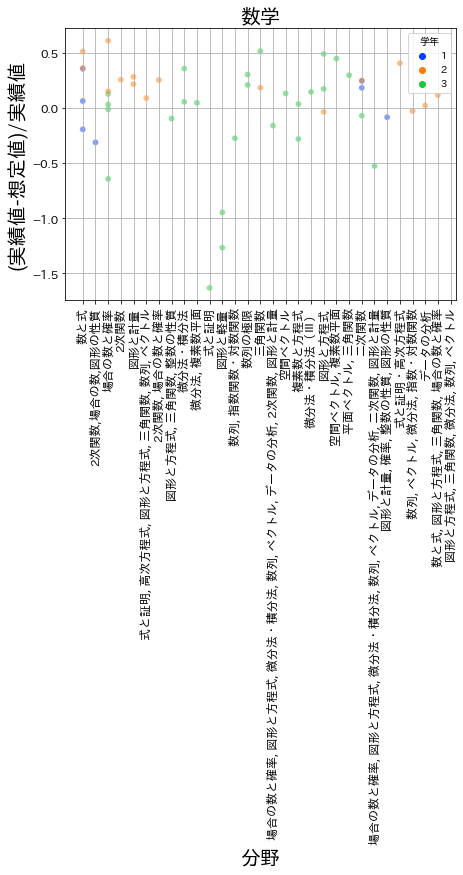

In [6]:
#グラフ描画
fig,axes = plt.subplots(1,1,figsize=(7,5))
graph_bunya(df[df["科目"] == "数学"],"数学","学年")
fig.savefig("/Users/s.ogura/Documents/CRLEA/figure/数学*分野.png")

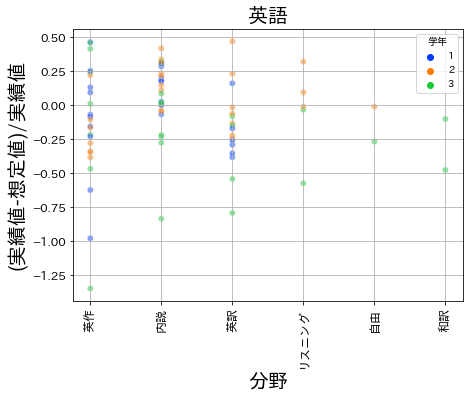

In [248]:
#グラフ描画
fig,axes = plt.subplots(1,1,figsize=(7,5))
graph_bunya(df[df["科目"] == "英語"],"英語","学年")
fig.savefig("/Users/s.ogura/Documents/CRLEA/figure/英語*分野.png")

In [279]:
#グラフ描画
def graph_jisseki(df,title ="実績ペース vs 最終ペース",hue = "科目"):
    x = np.linspace(0,1000,1000)
    y = x
    plt.plot(x,y, color = "black", ls = "--")
    # plt.plot(x,y/2, color = "red", ls = "--")
    # plt.plot(x,1.5*y, color = "black", ls = "--")
    plt.title(title,
                      fontsize=20) # タイトル
    plt.xlabel("実績ペース", fontsize=20) # x軸ラベル
    plt.ylabel("最終ペース", fontsize=20) # y軸ラベル
    plt.grid(True) # 目盛線の表示
    plt.tick_params(labelsize = 12) # 目盛線のラベルサイズ
    plt.xlim(0,1000)
    plt.ylim(0,1000)
    plt.xticks(np.arange(0, 1001, step=100))
    plt.yticks(np.arange(0, 1001, step=100))
    sns.scatterplot(x='実績ペース', y='最終ペース', hue = hue, palette='bright', alpha = 0.5, data=df)

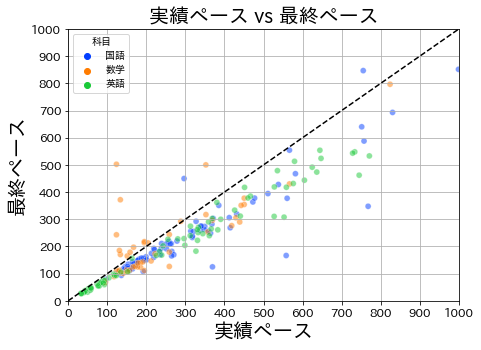

In [282]:
#グラフ描画
fig,axes = plt.subplots(1,1,figsize=(7,5))
graph_jisseki(df)
fig.savefig("/Users/s.ogura/Documents/CRLEA/figure/実績*最終.png")

In [105]:
# 割当に分野を結合して、新たなグループを作成する。
# df['割当'] = df['割当'].astype(str)
# df["割当_分野"] = df["割当"].str.cat(df["分野（和名）"].astype(str), sep="_")
# # カテゴリーの並び順を設定
# group_order = sorted(df["割当_分野"].unique())

In [140]:
# pip install japanize-matplotlib

In [89]:
# 割当に分野を結合して、新たなグループを作成する。
# df['割当'] = df['割当'].astype(str)
# df["割当_分野"] = df["割当"].str.cat(df["分野（和名）"].astype(str), sep="_")
# # カテゴリーの並び順を設定
# group_order = sorted(df["割当_分野"].unique())

# plt.figure(figsize=(8.4, 6))
# sns.scatterplot(x="ペース平均", y="想定ペース", data=df, hue="割当_分野", hue_order=group_order)
# plt.show()

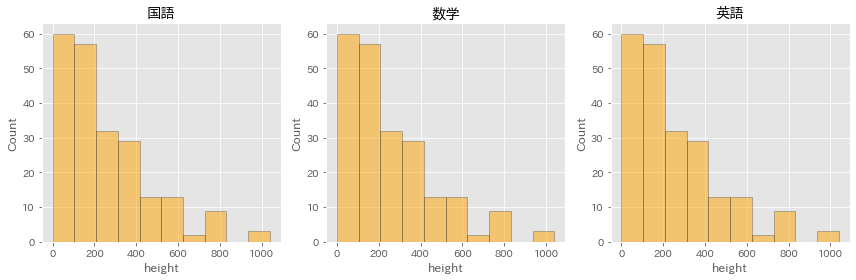

In [41]:
plt.figure(figsize=(12, 4))
for i, key_df in enumerate(df.groupby(["科目"]), 1):
    plt.subplot(1, 3, i)
    key = key_df[0]
    # key2 = key_df[1]
    plt.title(key)
    color = "blue" if key == "Men" else "Orange"
    plt.hist(df["ペース平均"], alpha=0.5, edgecolor="black", color=color)
    plt.xlabel("height")
    plt.ylabel("Count")
    plt.tight_layout()